#Importing libraries and cleaned_df_Eg dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
warnings.filterwarnings("ignore")
df=pd.read_csv('cleaned_df_Eg_Sn.csv')
pd.set_option('display.max_columns', None)
df.head(2)

,perovskite,E_g,Cs,FA,MA,Pb,Sn,I,Br
0,Cs0.025FA0.475MA0.5Pb0.5Sn0.5I3,1.27,0.025,0.475,0.5,0.5,0.5,3.0,0.0
1,Cs0.05FA0.45MA0.5Pb0.5Sn0.5I3,1.26,0.050,0.450,0.5,0.5,0.5,3.0,0.0


#Data Prep

In [3]:
dfx=df.iloc[:,2:]
X=dfx.values
y=df.iloc[:,1].values
y=y.reshape(len(y),1)
dfx

,Cs,FA,MA,Pb,Sn,I,Br
0,0.025,0.475,0.50,0.50,0.50,3.00,0.00
1,0.050,0.450,0.50,0.50,0.50,3.00,0.00
2,0.050,0.500,0.45,0.50,0.50,3.00,0.00
3,0.050,0.680,0.26,0.75,0.25,2.60,0.40
4,0.050,0.790,0.16,0.25,0.75,2.50,0.50
...,...,...,...,...,...,...,...
144,0.000,0.000,1.00,0.00,1.00,0.36,2.64
145,0.000,0.000,1.00,0.00,1.00,1.00,2.00
146,0.000,0.000,1.00,0.00,1.00,0.00,3.00
147,0.000,0.000,1.00,0.00,1.00,2.00,1.00


#Best Model

In [4]:
from catboost import CatBoostRegressor
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.15, random_state=100)
# Train model with the best hyperparameters
best_cb = CatBoostRegressor(
    iterations=447,
    depth=7,
    learning_rate=0.01160773886463643,
    l2_leaf_reg=0.17646457712200744,
    bagging_temperature=0.796219937369702,
    random_strength=3.372120712870285,
    border_count=110,
    od_type='IncToDec',
    od_wait=20,
    random_seed=100
)
best_cb.fit(X_train4, y_train4, verbose=0)

mse_scores = cross_val_score(estimator = best_cb, X = X_train4, y = y_train4, cv = 5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-mse_scores)
print("RMSE: {:.4f}".format(rmse_scores.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores.std()))

0:	learn: 0.2024395	total: 714us	remaining: 319ms
1:	learn: 0.2006118	total: 1.29ms	remaining: 287ms
2:	learn: 0.1991564	total: 1.78ms	remaining: 264ms
3:	learn: 0.1975633	total: 2.58ms	remaining: 285ms
4:	learn: 0.1959286	total: 3.05ms	remaining: 269ms
5:	learn: 0.1942813	total: 3.55ms	remaining: 261ms
6:	learn: 0.1927695	total: 4.14ms	remaining: 260ms
7:	learn: 0.1916919	total: 4.8ms	remaining: 263ms
8:	learn: 0.1904435	total: 5.44ms	remaining: 265ms
9:	learn: 0.1893493	total: 5.87ms	remaining: 256ms
10:	learn: 0.1878535	total: 6.44ms	remaining: 255ms
11:	learn: 0.1869874	total: 6.7ms	remaining: 243ms
12:	learn: 0.1853059	total: 7.16ms	remaining: 239ms
13:	learn: 0.1845304	total: 7.71ms	remaining: 239ms
14:	learn: 0.1829993	total: 8.23ms	remaining: 237ms
15:	learn: 0.1818940	total: 8.7ms	remaining: 234ms
16:	learn: 0.1802239	total: 9.15ms	remaining: 231ms
17:	learn: 0.1787099	total: 9.65ms	remaining: 230ms
18:	learn: 0.1773306	total: 10.1ms	remaining: 228ms
19:	learn: 0.1758184	total

In [5]:
y_pred_n4 = best_cb.predict(X_test4)
y_pred_n4 = y_pred_n4.reshape(len(y_pred_n4), 1)
r_value4 = np.corrcoef(y_test4.squeeze(), y_pred_n4.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_test4, y_pred_n4))
print("R value:", r_value4)
print("MAE on Test Set:", mean_absolute_error(y_test4, y_pred_n4))
print("MSE on Test Set:", mean_squared_error(y_test4, y_pred_n4))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test4, y_pred_n4)))

R2 on Test Set: 0.8833252835841952
R value: 0.9407409308745338
MAE on Test Set: 0.05073690873860278
MSE on Test Set: 0.004688294474412472
RMSE on Test Set: 0.06847112146308451


#Prediction with Experimental result

In [6]:
# Create a DataFrame for input
my_dict = {
    'Cs': [0, 0.05, 0.05, 0.05, 0.15, 0.15, 0.15, 0.15, 1, 1, 1, 1, 1,],
    'FA': [0.18, 0.5225, 0.855, 0.7, 0, 0, 0.7, 0.7, 0, 0, 0, 0, 0],
    'MA': [0.82, 0.4275, 0.095, 0.25, 0.85, 0.85, 0.15, 0.15, 0, 0, 0, 0, 0],
    'Pb': [0, 1, 1, 0.5, 1, 1, 1, 1, 1, 0.55, 0.25, 0.4, 0.4],
    'Sn': [1, 0, 0, 0.5, 0, 0, 0, 0, 0, 0.45, 0.75, 0.6, 0.6],
    'I': [0, 1.65, 2.85, 3, 2.25, 1.95, 0.45, 2.55, 1.5, 2, 1, 2.4, 2],
    'Br': [3, 1.35, 0.15, 0, 0.75, 1.05, 2.55, 0.45, 1.5, 1, 2, 0.6, 1],
    'Actual Bandgap': [1.92, 1.83, 1.56, 1.22,  1.71, 1.78, 2.05, 1.62, 1.97, 1.50, 1.64, 1.35, 1.42]  # Actual bandgap values
}

# Create the DataFrame from the dictionary
df_input = pd.DataFrame(my_dict)

# Predict the bandgap using the trained model (best_cb) using only composition details as input
composition_columns = ['Cs', 'FA', 'MA', 'Pb', 'Sn', 'I', 'Br']
df_input['Predicted Bandgap'] = best_cb.predict(df_input[composition_columns])
df_input['Predicted Bandgap'] = df_input['Predicted Bandgap'].round(2)

# Display the DataFrame with inputs, predictions, and actual bandgap values
df_input


,Cs,FA,MA,Pb,Sn,I,Br,Actual Bandgap,Predicted Bandgap
0,0.00,0.1800,0.8200,0.00,1.00,0.00,3.00,1.92,1.96
1,0.05,0.5225,0.4275,1.00,0.00,1.65,1.35,1.83,1.46
2,0.05,0.8550,0.0950,1.00,0.00,2.85,0.15,1.56,1.45
3,0.05,0.7000,0.2500,0.50,0.50,3.00,0.00,1.22,1.26
4,0.15,0.0000,0.8500,1.00,0.00,2.25,0.75,1.71,1.43
5,0.15,0.0000,0.8500,1.00,0.00,1.95,1.05,1.78,1.47
6,0.15,0.7000,0.1500,1.00,0.00,0.45,2.55,2.05,1.50
7,0.15,0.7000,0.1500,1.00,0.00,2.55,0.45,1.62,1.42
8,1.00,0.0000,0.0000,1.00,0.00,1.50,1.50,1.97,1.59
9,1.00,0.0000,0.0000,0.55,0.45,2.00,1.00,1.50,1.41


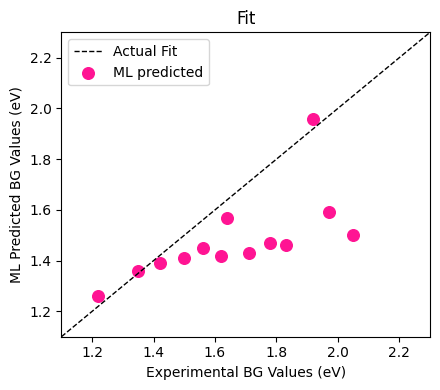

In [7]:
plt.figure(figsize=(4.5, 4))
x_min, x_max = 1.1, 2.3
plt.plot([x_min, x_max], [x_min, x_max], color='black', linestyle='--', linewidth=1, label='Actual Fit')
plt.scatter(df_input['Actual Bandgap'], df_input['Predicted Bandgap'], color='deeppink', s=70, label='ML predicted')

plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Experimental BG Values (eV)')
plt.ylabel('ML Predicted BG Values (eV)')
plt.legend()
#plt.grid(True)
plt.title('Fit')
plt.savefig('Fit.png')

# Set xlim and ylim
plt.xlim(1.1, 2.3)  # Adjust these values as needed
plt.ylim(1.1, 2.3)  # Adjust these values as needed

plt.tight_layout()
plt.show()

#Bandgap generation for CBM and VBM

In [ ]:
dfb=pd.read_csv('cbm_vbm_new.csv') # import file modify it and save it again in the same name
dfb.head()

,Cs,FA,MA,Pb,Sn,I,Br,BG,CBM,VBM
0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,1.564,-3.90,-5.45
1,1.0,0.0,0.0,1.0,0.0,3.0,0.0,1.709,-3.60,-5.40
2,1.0,0.0,0.0,1.0,0.0,2.0,1.0,1.877,-3.69,-5.60
3,1.0,0.0,0.0,1.0,0.0,0.0,3.0,2.328,-3.30,-5.60
4,0.0,0.5,0.5,0.5,0.5,3.0,0.0,1.255,-4.15,-5.40


In [9]:
index_of_column = dfb.columns.get_loc('Br')
print(f"The index of 'column_name' is: {index_of_column}")

The index of 'column_name' is: 6


In [10]:
dfb1=dfb.iloc[:,:7]
#df3 = pd.concat([df2.iloc[:,0],df2.iloc[:,2:4],df3,df2.iloc[:,1],df2.iloc[:,4:6],df2.iloc[:,11:]], axis=1)
dfb1

,Cs,FA,MA,Pb,Sn,I,Br
0,0.0,0.0,1.0,1.00,0.00,3.0,0.0
1,1.0,0.0,0.0,1.00,0.00,3.0,0.0
2,1.0,0.0,0.0,1.00,0.00,2.0,1.0
3,1.0,0.0,0.0,1.00,0.00,0.0,3.0
4,0.0,0.5,0.5,0.50,0.50,3.0,0.0
...,...,...,...,...,...,...,...
105,1.0,0.0,0.0,0.25,0.75,3.0,0.0
106,0.0,1.0,0.0,0.00,1.00,3.0,0.0
107,1.0,0.0,0.0,1.00,0.00,2.0,1.0
108,1.0,0.0,0.0,0.70,0.30,3.0,0.0


In [11]:
inp=dfb1.values
Eg_predicted = best_cb.predict(inp)
Eg_predicted = Eg_predicted.reshape(len(Eg_predicted), 1)
Eg_predicted

array([[1.43378195],
       [1.43769779],
       [1.52280436],
       [1.58915478],
       [1.25688198],
       [1.43378195],
       [1.48877017],
       [1.52280436],
       [1.69837745],
       [1.35633054],
       [1.30330879],
       [1.32139681],
       [1.3854208 ],
       [1.4824915 ],
       [1.62895815],
       [2.04444086],
       [1.3782516 ],
       [1.43934092],
       [1.391007  ],
       [1.43378195],
       [1.34576883],
       [1.29256103],
       [1.30359996],
       [1.34176321],
       [1.29938035],
       [1.35481925],
       [1.42350626],
       [1.38519317],
       [1.48660087],
       [1.58915478],
       [1.43769779],
       [1.43378195],
       [1.29790446],
       [1.25309123],
       [1.22369633],
       [1.26915037],
       [1.29938035],
       [1.42936779],
       [1.43986275],
       [1.44586148],
       [1.50567243],
       [1.46342012],
       [1.41192664],
       [1.45292366],
       [1.43750838],
       [1.4109552 ],
       [1.43438748],
       [1.423

In [12]:
dfb2 = pd.DataFrame(Eg_predicted, columns=['ML_Eg'])
dfb2['ML_Eg'] = dfb2['ML_Eg'].round(3)
dfb2

,ML_Eg
0,1.434
1,1.438
2,1.523
3,1.589
4,1.257
...,...
105,1.275
106,1.378
107,1.523
108,1.356


In [13]:
cbm_vbm_new = pd.concat([dfb.iloc[:,0:7],dfb2,dfb.iloc[:,7:]], axis=1)
cbm_vbm_new

,Cs,FA,MA,Pb,Sn,I,Br,ML_Eg,BG,CBM,VBM
0,0.0,0.0,1.0,1.00,0.00,3.0,0.0,1.434,1.564,-3.90,-5.45
1,1.0,0.0,0.0,1.00,0.00,3.0,0.0,1.438,1.709,-3.60,-5.40
2,1.0,0.0,0.0,1.00,0.00,2.0,1.0,1.523,1.877,-3.69,-5.60
3,1.0,0.0,0.0,1.00,0.00,0.0,3.0,1.589,2.328,-3.30,-5.60
4,0.0,0.5,0.5,0.50,0.50,3.0,0.0,1.257,1.255,-4.15,-5.40
...,...,...,...,...,...,...,...,...,...,...,...
105,1.0,0.0,0.0,0.25,0.75,3.0,0.0,1.275,1.285,-3.63,-4.91
106,0.0,1.0,0.0,0.00,1.00,3.0,0.0,1.378,1.307,-4.55,-5.96
107,1.0,0.0,0.0,1.00,0.00,2.0,1.0,1.523,1.877,-4.16,-6.08
108,1.0,0.0,0.0,0.70,0.30,3.0,0.0,1.356,1.419,-4.10,-5.44


In [14]:
cbm_vbm_new.to_csv('cbm_vbm_new.csv', index=False)

#Download the CSV file
# from google.colab import files
# files.download('cbm_vbm_new.csv')